Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import warnings
warnings.filterwarnings('ignore')

Loading Dataset

In [2]:
df = pd.read_csv("C:/Users/bshiv/Downloads/Cloud Counselage Assignment/customer_data(Sheet1).csv")

In [3]:
# Display first few rows and basic information
print("First few rows of the dataset:")
display(df.head())
print("\nDataset Info:")
display(df.info())

First few rows of the dataset:


,customer_id,age,gender,annual_income,last_visited_days_ago,session_duration,pages_visited,device,purchase
0,1,56.0,male,NaN,7.0,17.0,15.0,desktop,0
1,2,69.0,female,47617.0,4.0,35.0,19.0,mobile,0
2,3,46.0,male,94258.0,30.0,NaN,15.0,mobile,0
3,4,32.0,female,70075.0,19.0,4.0,12.0,mobile,0
4,5,60.0,male,146998.0,16.0,51.0,NaN,mobile,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            10000 non-null  int64  
 1   age                    9000 non-null   float64
 2   gender                 9000 non-null   object 
 3   annual_income          9000 non-null   float64
 4   last_visited_days_ago  9000 non-null   float64
 5   session_duration       9000 non-null   float64
 6   pages_visited          9000 non-null   float64
 7   device                 10000 non-null  object 
 8   purchase               10000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 703.3+ KB


None

Data Exploration and Preprocessing

In [4]:
# Analyzing missing values
print("\nMissing Values Analysis:")
display(df.isnull().sum())
print("\nMissing Values Percentage:")
display((df.isnull().sum() / len(df) * 100).round(2))


Missing Values Analysis:


customer_id                 0
age                      1000
gender                   1000
annual_income            1000
last_visited_days_ago    1000
session_duration         1000
pages_visited            1000
device                      0
purchase                    0
dtype: int64


Missing Values Percentage:


customer_id               0.0
age                      10.0
gender                   10.0
annual_income            10.0
last_visited_days_ago    10.0
session_duration         10.0
pages_visited            10.0
device                    0.0
purchase                  0.0
dtype: float64

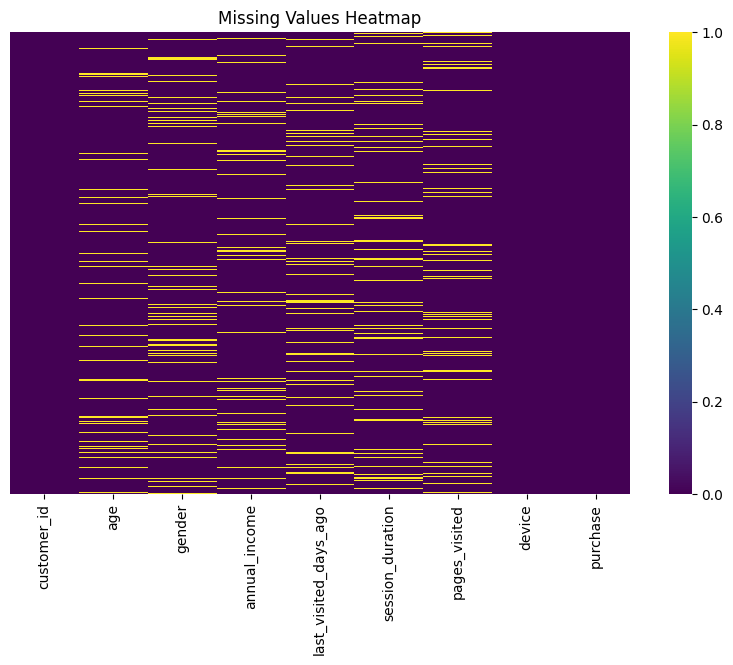

In [5]:
# Visualizing missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [6]:
# Analyzing numerical variables
print("\nNumerical Variables Statistics:")
display(df.describe())


Numerical Variables Statistics:


,customer_id,age,annual_income,last_visited_days_ago,session_duration,pages_visited,purchase
count,10000.00000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,10000.000000
mean,5000.50000,44.109333,109628.591111,15.018111,30.818111,10.457556,0.303100
std,2886.89568,15.220279,51990.151925,8.906810,17.280978,5.757072,0.459621
min,1.00000,18.000000,20016.000000,0.000000,1.000000,1.000000,0.000000
25%,2500.75000,31.000000,64318.500000,7.000000,16.000000,6.000000,0.000000
50%,5000.50000,44.000000,110326.500000,15.000000,31.000000,10.000000,0.000000
75%,7500.25000,57.000000,154725.250000,23.000000,46.000000,15.000000,1.000000
max,10000.00000,70.000000,199971.000000,30.000000,60.000000,20.000000,1.000000


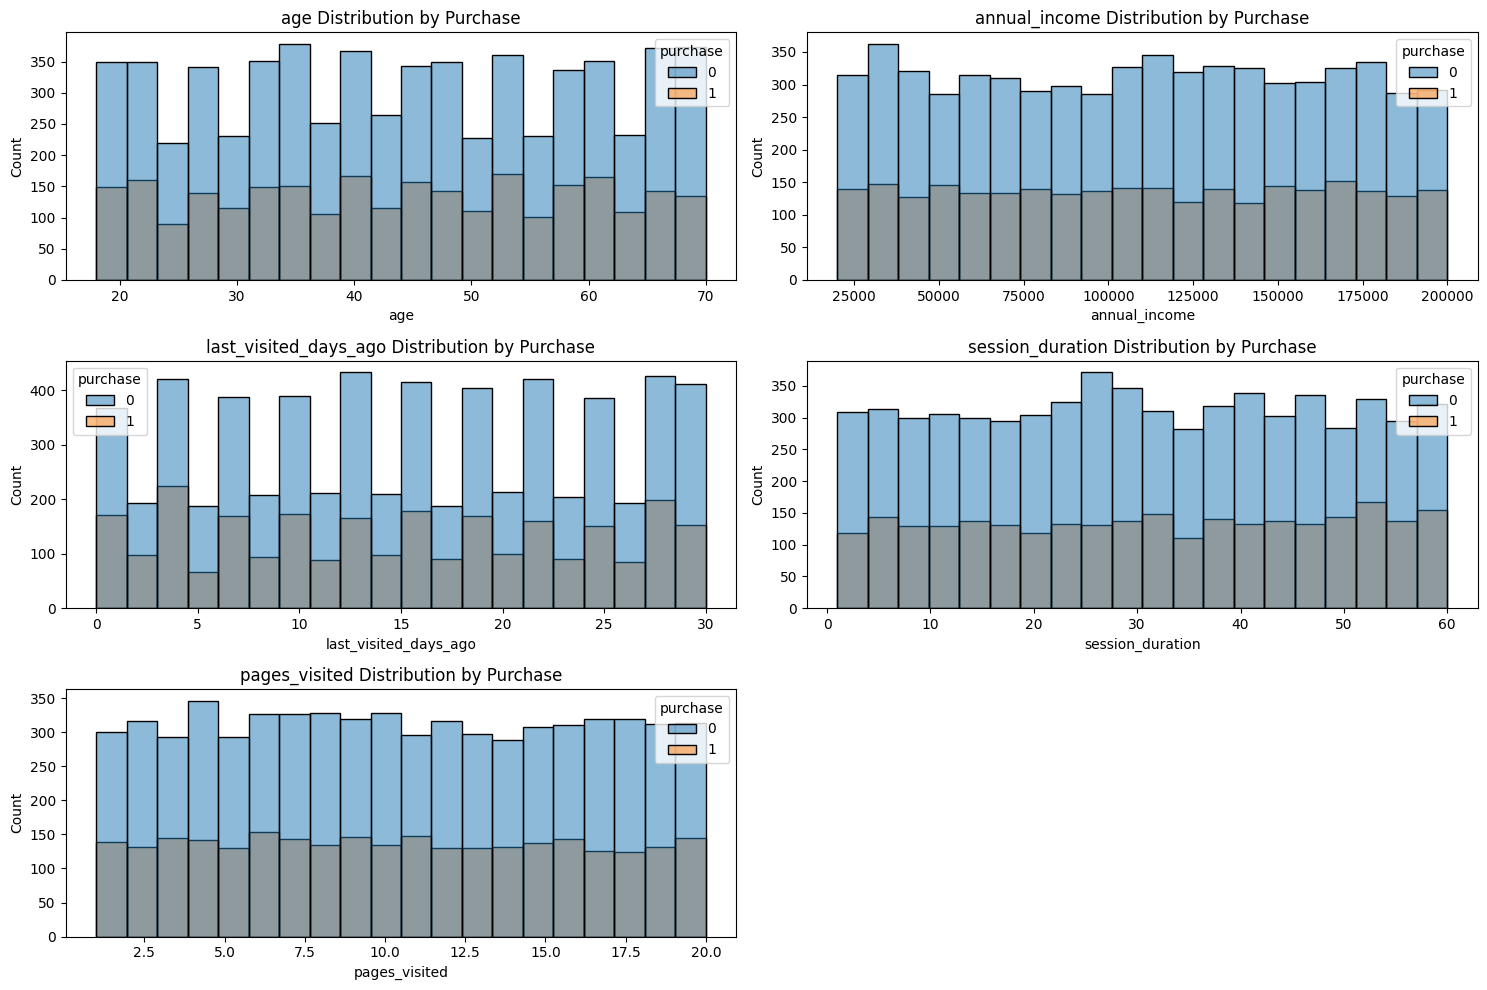

In [7]:
# Visualizing distributions
numerical_cols = ['age', 'annual_income', 'last_visited_days_ago', 'session_duration', 'pages_visited']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=df, x=col, hue='purchase', bins=20)
    plt.title(f'{col} Distribution by Purchase')
plt.tight_layout()
plt.show()


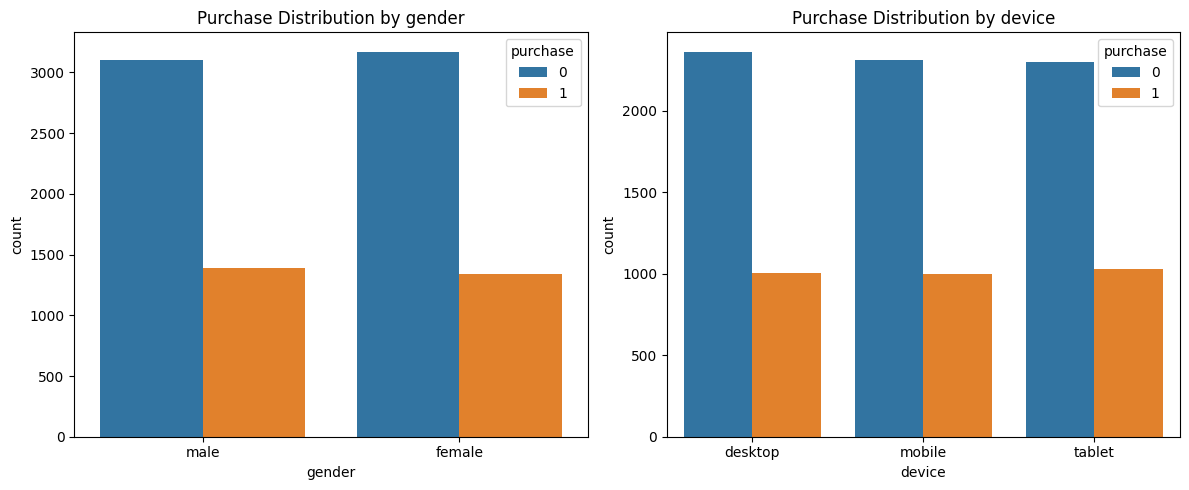

In [8]:
# Analyzing categorical variables
categorical_cols = ['gender', 'device']
plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 2, i)
    sns.countplot(data=df, x=col, hue='purchase')
    plt.title(f'Purchase Distribution by {col}')
plt.tight_layout()
plt.show()


In [9]:
# Handling missing values
# For numerical variables
numeric_imputer = SimpleImputer(strategy='median')
df[numerical_cols] = numeric_imputer.fit_transform(df[numerical_cols])

In [10]:
# For categorical variables
for col in categorical_cols:
    df[col] = df[col].fillna('unknown')

In [11]:
# Encoding categorical variables
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [12]:
print("\nEncoded categorical values:")
for col in categorical_cols:
    print(f"\n{col} mapping:")
    for i, label in enumerate(label_encoders[col].classes_):
        print(f"{label}: {i}")


Encoded categorical values:

gender mapping:
female: 0
male: 1
unknown: 2

device mapping:
desktop: 0
mobile: 1
tablet: 2


Feature Engineering

In [13]:
# Creating new features
df['days_since_visit_ratio'] = df['last_visited_days_ago'] / (df['session_duration'] + 1)
df['pages_per_minute'] = df['pages_visited'] / (df['session_duration'] + 1)
df['income_age_ratio'] = df['annual_income'] / (df['age'] + 1)
df['engagement_score'] = (df['pages_visited'] * df['session_duration']) / (df['last_visited_days_ago'] + 1)

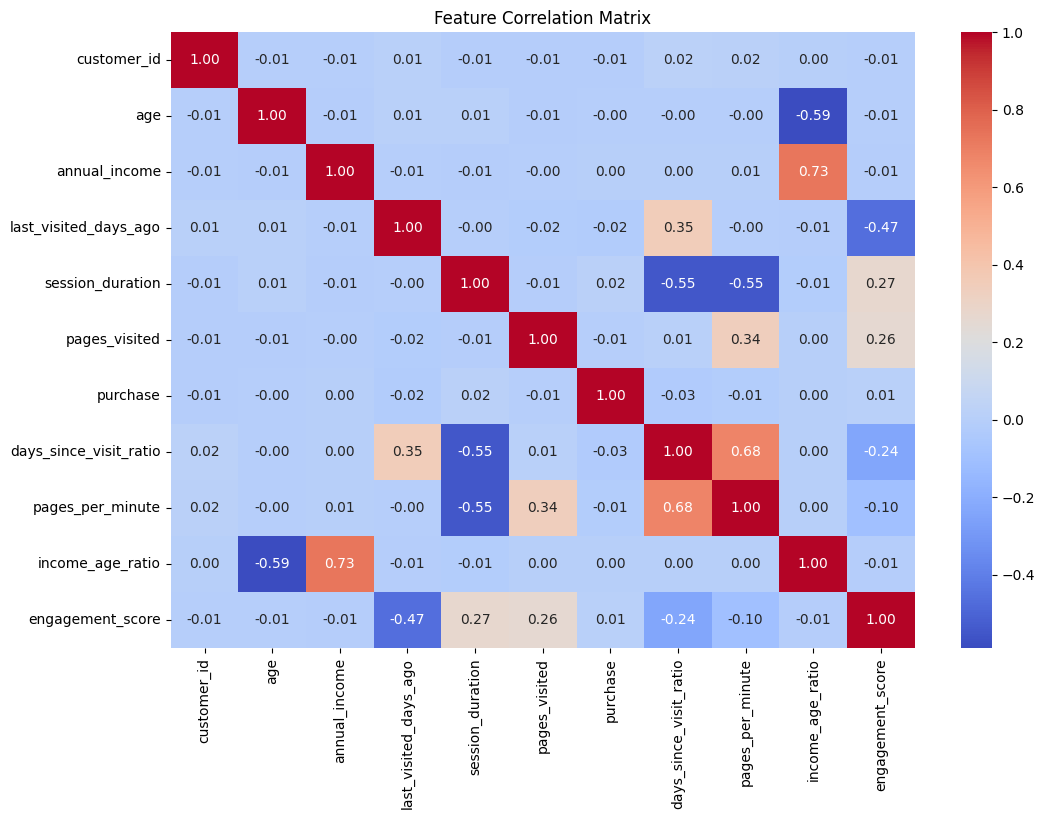

In [14]:
# Checking correlations
plt.figure(figsize=(12, 8))
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

In [15]:
# Scaling features
features_to_scale = numerical_cols + ['days_since_visit_ratio', 'pages_per_minute',
                                    'income_age_ratio', 'engagement_score']
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

Model Selection and Training

In [16]:
# Preparing features and target
X = df.drop(['purchase', 'customer_id'], axis=1)
y = df['purchase']

In [17]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
# Training multiple models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}


In [19]:
# Training and evaluating each model
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred)
    }

    print(f"\n{name} Results:")
    print(classification_report(y_test, y_pred))


Training Logistic Regression...

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.69      0.46      0.55      1394
           1       0.30      0.52      0.38       606

    accuracy                           0.48      2000
   macro avg       0.49      0.49      0.47      2000
weighted avg       0.57      0.48      0.50      2000


Training Random Forest...

Random Forest Results:
              precision    recall  f1-score   support

           0       0.70      0.96      0.81      1394
           1       0.35      0.04      0.08       606

    accuracy                           0.69      2000
   macro avg       0.52      0.50      0.44      2000
weighted avg       0.59      0.69      0.59      2000


Training Gradient Boosting...

Gradient Boosting Results:
              precision    recall  f1-score   support

           0       0.70      0.99      0.82      1394
           1       0.38      0.01      0.02       606

    accur

In [20]:
# Comparing models
results_df = pd.DataFrame(results).T
print("\nModel Comparison:")
display(results_df)


Model Comparison:


,accuracy,precision,recall,f1
Logistic Regression,0.4810,0.297373,0.523102,0.379187
Random Forest,0.6850,0.346154,0.044554,0.078947
Gradient Boosting,0.6955,0.384615,0.008251,0.016155


<Figure size 1000x600 with 0 Axes>

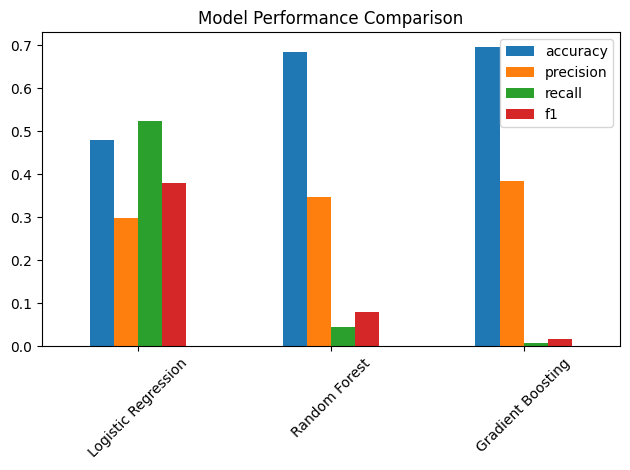

In [21]:
# Visualizing model comparisons
plt.figure(figsize=(10, 6))
results_df.plot(kind='bar')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
# Finding best model
best_model_name = results_df['accuracy'].idxmax()
best_model = models[best_model_name]
print(f"Best Model: {best_model_name}")

Best Model: Gradient Boosting


Hyperparameter Tuning for Gradient Boosting

In [24]:
# Defining parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]}  

# Instantiating Gradient Boosting and perform GridSearchCV
gb_model = GradientBoostingClassifier(random_state=42)  
grid_search_gb = GridSearchCV(gb_model, param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_gb.fit(X_train.to_numpy(), y_train)  
# Printing best parameters and score
print("\nBest parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best cross-validation score for Gradient Boosting:", grid_search_gb.best_score_)

# Evaluating the best Gradient Boosting model on the test set
best_gb_estimator = grid_search_gb.best_estimator_
y_pred_gb = best_gb_estimator.predict(X_test)

print("\nGradient Boosting Results (after hyperparameter tuning):")
print(classification_report(y_test, y_pred_gb))


Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validation score for Gradient Boosting: 0.69725

Gradient Boosting Results (after hyperparameter tuning):
              precision    recall  f1-score   support

           0       0.70      1.00      0.82      1394
           1       1.00      0.00      0.00       606

    accuracy                           0.70      2000
   macro avg       0.85      0.50      0.41      2000
weighted avg       0.79      0.70      0.57      2000



Hyperparameter Tuning for Random Forest

In [25]:
# Defining parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'] 
}

# Instantiating Random Forest and perform GridSearchCV
rf_model = RandomForestClassifier(random_state=42)  
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train.to_numpy(), y_train) 

# Printing best parameters and score
print("\nBest parameters for Random Forest:", grid_search_rf.best_params_)
print("Best cross-validation score for Random Forest:", grid_search_rf.best_score_)

# Evaluating the best Random Forest model on the test set
best_rf_estimator = grid_search_rf.best_estimator_
y_pred_rf = best_rf_estimator.predict(X_test)

print("\nRandom Forest Results (after hyperparameter tuning):")
print(classification_report(y_test, y_pred_rf))


Best parameters for Random Forest: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validation score for Random Forest: 0.69675

Random Forest Results (after hyperparameter tuning):
              precision    recall  f1-score   support

           0       0.70      1.00      0.82      1394
           1       0.50      0.00      0.00       606

    accuracy                           0.70      2000
   macro avg       0.60      0.50      0.41      2000
weighted avg       0.64      0.70      0.57      2000



Evaluate the tuned Random Forest model

In [26]:
final_rf_model = grid_search_rf.best_estimator_
y_pred_final_rf = final_rf_model.predict(X_test.to_numpy())

print("\nFinal Random Forest Model Performance (after hyperparameter tuning):")
print(classification_report(y_test, y_pred_final_rf))


Final Random Forest Model Performance (after hyperparameter tuning):
              precision    recall  f1-score   support

           0       0.70      1.00      0.82      1394
           1       0.50      0.00      0.00       606

    accuracy                           0.70      2000
   macro avg       0.60      0.50      0.41      2000
weighted avg       0.64      0.70      0.57      2000



Model Deployment Simulation 

In [28]:
# Creating new customer data
new_customer = pd.DataFrame({
    'age': [69],
    'gender': ['female'],
    'annual_income': [47617],
    'last_visited_days_ago': [4],
    'session_duration': [35],
    'pages_visited': [19],
    'device': ['mobile']
})

In [29]:
# Preprocessing new data
def preprocess_new_data(data, label_encoders, scaler):
    # Handling categorical variables
    for col, encoder in label_encoders.items():
        data[col] = data[col].fillna('unknown')
        data[col] = encoder.transform(data[col])

    # Creating engineered features
    data['days_since_visit_ratio'] = data['last_visited_days_ago'] / (data['session_duration'] + 1)
    data['pages_per_minute'] = data['pages_visited'] / (data['session_duration'] + 1)
    data['income_age_ratio'] = data['annual_income'] / (data['age'] + 1)
    data['engagement_score'] = (data['pages_visited'] * data['session_duration']) / (data['last_visited_days_ago'] + 1)

    # Scaling features
    features_to_scale = numerical_cols + ['days_since_visit_ratio', 'pages_per_minute',
                                        'income_age_ratio', 'engagement_score']
    data[features_to_scale] = scaler.transform(data[features_to_scale])

    return data

In [30]:
# Making predictions for a new customer using the best Random Forest model
processed_customer = preprocess_new_data(new_customer.copy(), label_encoders, scaler)
prediction_rf = final_rf_model.predict(processed_customer)
probability_rf = final_rf_model.predict_proba(processed_customer)

print("\nPrediction for new customer (Random Forest):")
print("Will purchase" if prediction_rf[0] == 1 else "Will not purchase")
print(f"Probability of purchase: {probability_rf[0][1]:.2%}")


Prediction for new customer (Random Forest):
Will not purchase
Probability of purchase: 21.48%
